In [91]:
import pandas as pd
import os
import json
import numpy as np


import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns




In [68]:
## Read in the data for one file (=one day)

filename = 'ovfiets_201701/OVFiets_2017-01-04.csv.xz'

df = pd.read_csv(filename,header = None)
# print(df)
# print(df.head)

In [69]:
time_df = df[0]         # all times orresponding to an update
nan_df = df[1]          # some other value which is always NaN
info_set = df[2]        # all other info in one string/set
# print(type(info_set[0])) # check that info_set is currently a string
info_set_json = json.loads(info_set[0]) # use json_loads to make a dictionary from the string
print(info_set_json)    # Now it's a dictionary
# print(info_set_json["name"])    # Call one item from the dictionary
# print(type(info_set_json))  

{'name': 'OV-fiets', 'extra': {'fetchTime': 1483498800, 'rentalBikes': '6', 'locationCode': 'wc001'}, 'apps': [], 'sites': [], 'lat': 51.81136, 'link': {'params': {}, 'uri': 'https://places.ns-mlab.nl/api/v2/places/station-retail/OV-fiets-wc001'}, 'stationCode': 'WC', 'openingHours': [{'dayOfWeek': 1, 'endTime': '00:00', 'closesNextDay': True, 'startTime': '00:00'}, {'dayOfWeek': 2, 'endTime': '00:00', 'closesNextDay': True, 'startTime': '00:00'}, {'dayOfWeek': 3, 'endTime': '00:00', 'closesNextDay': True, 'startTime': '00:00'}, {'dayOfWeek': 4, 'endTime': '00:00', 'closesNextDay': True, 'startTime': '00:00'}, {'dayOfWeek': 5, 'endTime': '00:00', 'closesNextDay': True, 'startTime': '00:00'}, {'dayOfWeek': 6, 'endTime': '00:00', 'closesNextDay': True, 'startTime': '00:00'}, {'dayOfWeek': 7, 'endTime': '00:00', 'closesNextDay': True, 'startTime': '00:00'}], 'lng': 5.72893, 'open': 'Yes', 'description': 'Wijchen'}


In [ ]:
# Opening different values from the dictionary for the first row in the dataset

print(info_set_json["name"])          # → OV-fiets
print(info_set_json["description"])   # → Delft Zuid
print(info_set_json["open"])          # → Yes
print(info_set_json["extra"])
print(info_set_json["extra"]['rentalBikes'])

print(df[0][0])


OV-fiets
Wijchen
Yes
{'fetchTime': 1483498800, 'rentalBikes': '6', 'locationCode': 'wc001'}
6
2017-01-04 04:00:00.368134+01:00


In [90]:
# Parse the data from strings to dictionaries/floats
df["parsed"] = df[2].apply(json.loads)
# print(df['parsed'])

# Flatten into new columns
df2_flat = pd.json_normalize(df["parsed"])

# Combine back with your original DataFrame (optional)
df2_flat = pd.concat([df, df2_flat], axis=1)
df2_flat['extra.rentalBikes'] = df2_flat['extra.rentalBikes'].astype(float)
df2_flat[0] = pd.to_datetime(df2_flat[0])
# df2_flat = df2_flat.set_index(0)
df2_flat = df2_flat.rename(columns={0: "time"})



print(df2_flat.columns)
print(df2_flat.head())
print(df2_flat['extra.rentalBikes'])

## make columns with interesting numbers from string to float using .astype(float)

Index([              'time',                    1,                    2,
                          3,             'parsed',               'name',
                     'apps',              'sites',                'lat',
              'stationCode',       'openingHours',                'lng',
                     'open',        'description',    'extra.fetchTime',
        'extra.rentalBikes', 'extra.locationCode',           'link.uri'],
      dtype='object')
                              time   1  \
0 2017-01-04 04:00:00.368134+01:00 NaN   
1 2017-01-04 04:00:01.369407+01:00 NaN   
2 2017-01-04 04:00:02.370844+01:00 NaN   
3 2017-01-04 04:00:03.372489+01:00 NaN   
4 2017-01-04 04:00:04.373541+01:00 NaN   

                                                   2  \
0  {"name": "OV-fiets", "extra": {"fetchTime": 14...   
1  {"name": "OV-fiets", "extra": {"fetchTime": 14...   
2  {"name": "OV-fiets", "extra": {"fetchTime": 14...   
3  {"name": "OV-fiets", "extra": {"fetchTime": 14...   
4  {"n

In [79]:
# Keep only unique station codes to find locations of ov-fiets rental origins

df_locations = df2_flat.drop_duplicates(subset=['stationCode'])

print(len(df_locations))

df_lons = df_locations['lng']
df_lats = df_locations['lat']
df_stationcode = df_locations['stationCode']

# plt.figure
# plt.scatter(df_lons,df_lats)

232


In [80]:
# create the plotly express map here
q2_fig = px.scatter_map(df_locations, lat='lat',lon="lng",hover_data=('stationCode',),zoom=5.5,center={'lat':52.1010,"lon":5.6461},
                           title='OV-fiets rental locations')

q2_fig.show()



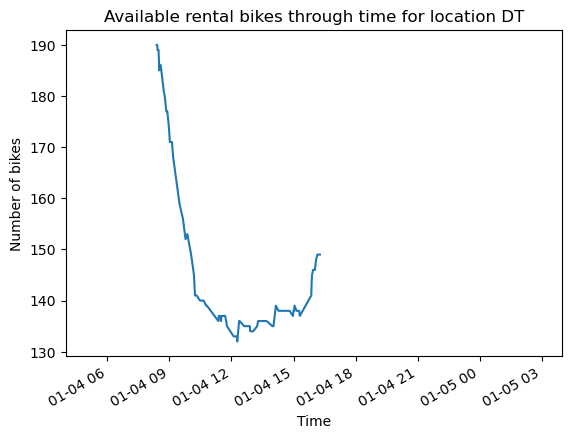

In [ ]:
## Plot the amount of available rental bikes through time for one station
station = 'DT'
df2_flat_onestation = df2_flat[df2_flat['stationCode'] == station]
x = df2_flat_onestation['time']  
y = df2_flat_onestation['extra.rentalBikes']

# # y contains NaN values outside of opening hours
# print(x)
# print(y)

plt.figure()
plt.plot(x,y)
plt.xlim(x.min(),x.max())
plt.title(f"Available rental bikes through time for location {station}")
plt.xlabel("Time")
plt.ylabel("Number of bikes")
plt.gcf().autofmt_xdate()  # rotates labels
# plt.tight_layout()



In [73]:
# Plot all stations in one plot

for i in df_locations["description"]:
    print(i)

Wijchen
Echt
Rosmalen
Vught
Nijmegen Goffert
Nijmegen Heyendaal
Zoetermeer Rokkeveen
Zoetermeer Oost
Pijnacker
Nootdorp
Voorburg
Den Haag Mariahoeve
Delft, Fietsenstalling
Voorschoten
Delft Zuid
Den Haag Laan van NOI
Rijswijk
Den Haag HS
Leiden Lammenschans
Leiden de Vink
Rotterdam Alexander
Leiden Centraal,Uitgang LUMC
Rotterdam Blaak
Schiedam
Rotterdam Capelsebrug
Alphen aan den Rijn  06 307 632 98
Gouda 06 12089835
Vlaardingen Oost
Vlaardingen Centrum
Gouda Goverwelle
Rotterdam Lombardijen
Vlaardingen West
Voorhout
Maassluis
Barendrecht
Hoek van Holland Haven
Zwijndrecht
Woerden
Hillegom
Dordrecht
Hoofddorp
Sliedrecht
Schiphol
Heemstede-Aerdenhout
Zandvoort
Vleuten
Breukelen
IJsselstijn UT
Utrecht Terwijde
Maarssen-Fietsenstalling
Overveen
Haarlem
Haarlem Spaarnwoude
Utrecht Leidsche Rijn
Bloemendaal
Gorinchem
Lage Zwaluwe
Halfweg Zwanenburg
Amsterdam Mahlerplein
Amsterdam Lelylaan
Santpoort Zuid
Amsterdam RAI
Utrecht Zuilen
Elst
Arnhem
Nijmegen
Westervoort
Wolfheze
Velp
Zevenaar
Rh

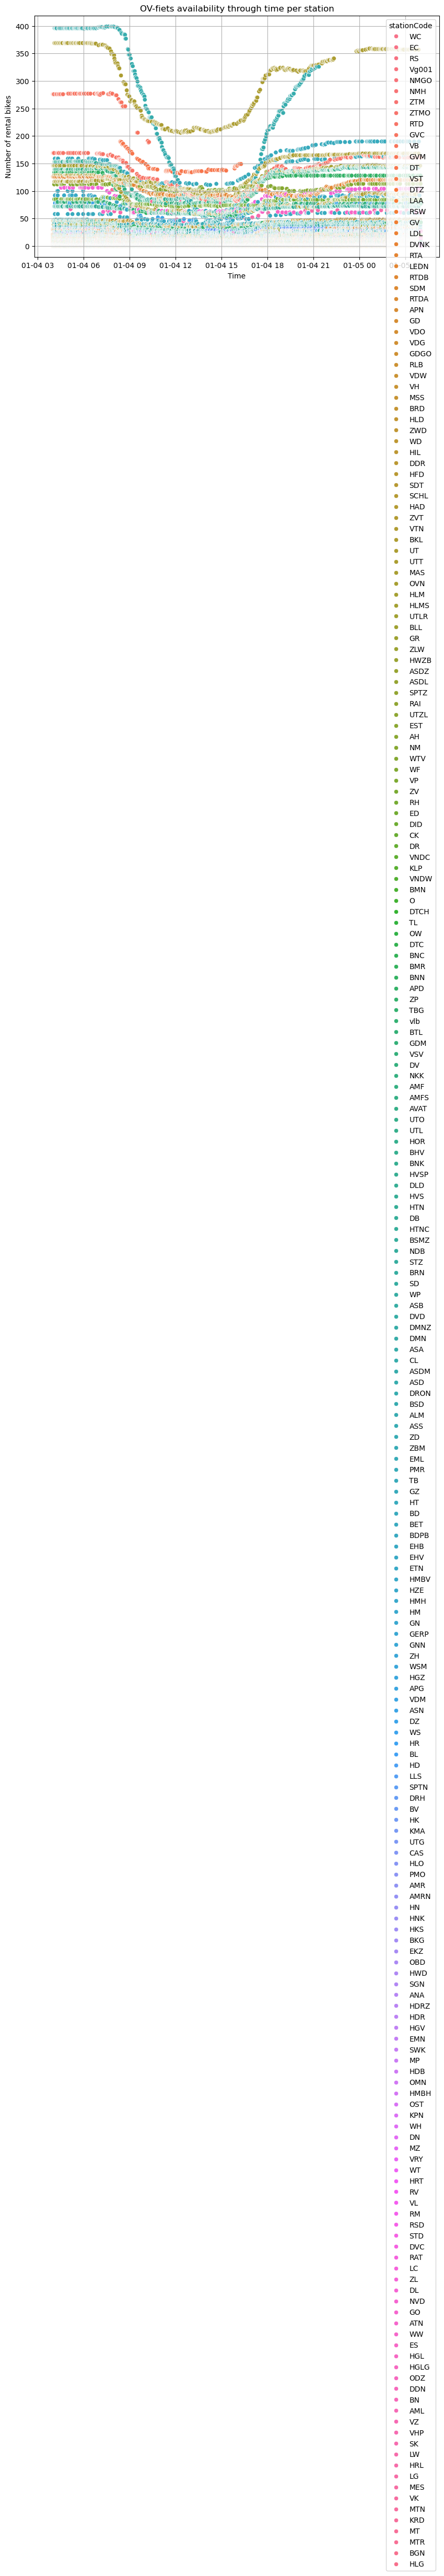

In [94]:

# fig, ax = plt.subplots() #figsize=(8,6))

# ax = df2_flat.groupby('stationCode')['extra.rentalBikes'].plot(kind='line', legend=True)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df2_flat,
    x="time",
    y="extra.rentalBikes",
    hue="stationCode"   # one color per station
)

plt.xlabel("Time")
plt.ylabel("Number of rental bikes")
plt.title("OV-fiets availability through time per station")
plt.grid(True)
# plt.tight_layout()